# Кулонівський інтеграл для $1s$-стану


## 1. Визначення

$$
J = \int_{V_1}\!\int_{V_2}
\frac{|\Psi_{100}(\mathbf r_1)|^2\,|\Psi_{100}(\mathbf r_2)|^2}
{|\mathbf r_1-\mathbf r_2|}\,dV_1\,dV_2.
\tag{1}
$$

---

## 2. Хвильова функція $1s$ у атомних одиницях

$$
\Psi_{100}(\mathbf r)=\sqrt{\frac{Z^3}{\pi}}\,e^{-Z r}, \qquad
|\Psi_{100}(\mathbf r)|^2=\frac{Z^3}{\pi}e^{-2Zr}.
$$

---

## 3. Формулювання задачі

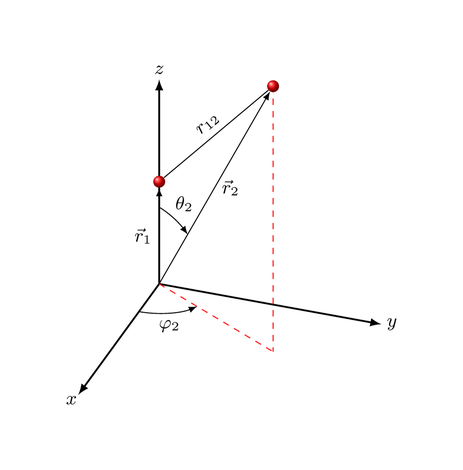

Фіксуємо $\mathbf r_1$ і вибираємо вісь $z$ вздовж нього. Тоді

$$
|\mathbf r_1-\mathbf r_2|=\sqrt{r_1^2+r_2^2-2r_1r_2\cos\theta_2},
$$

що не залежить від $\varphi_2$. Отже

$$
J=\int dV_1\,|\Psi_{100}(\mathbf r_1)|^2
\int |\Psi_{100}(\mathbf r_2)|^2
\frac{r_2^2\sin\theta_2\,dr_2\,d\theta_2\,d\varphi_2}
{\sqrt{r_1^2+r_2^2-2r_1r_2\cos\theta_2}}.
\tag{2}
$$

---

## 4. Інтегрування по куту $\theta_2$

$$
\frac{\sin\theta_2}{\sqrt{r_1^2+r_2^2-2r_1r_2\cos\theta_2}}
=\frac{1}{r_1r_2}\frac{d}{d\theta_2}\sqrt{r_1^2+r_2^2-2r_1r_2\cos\theta_2},
$$

тому

$$
\int_0^\pi\frac{\sin\theta_2\,d\theta_2}{\sqrt{r_1^2+r_2^2-2r_1r_2\cos\theta_2}}
=\frac{|r_1+r_2|-|r_1-r_2|}{r_1r_2}.
$$

$$
=
\begin{cases}
\dfrac{2}{r_1}, & r_1 > r_2, \\
\dfrac{2}{r_2}, & r_2 > r_1.
\end{cases}
$$

---

## 5. Розбиття інтегралу

$$
J = \int dV_1 \, |\Psi_{100}(\mathbf r_1)|^2 
\left( \int_0^{r_1} dr_2 \, r_2^2 e^{-2Z r_2}\frac{2}{r_1}
+ \int_{r_1}^\infty dr_2 \, r_2^2 e^{-2Z r_2}\frac{2}{r_2} \right) =
\int dV_1 \, |\Psi_{100}(\mathbf r_1)|^2  \left( \frac{\left(- Z r_{1} + e^{2 Z r_{1}} - 1\right) e^{- 2 Z r_{1}}}{r_{1}} \right) .
\tag{3}
$$

---

## 6. Остаточне інтегрування


Інтеграл по $r_1$ відносно простий: 

$$ 
J = \int\limits_{0}^{\infty} r_1^2 \sin\theta_1 d\theta_1 d\phi_1 \frac{Z^{3} e^{- 2 Z r_1}}{\pi} \left( \frac{\left(- Z r_{1} + e^{2 Z r_{1}} - 1\right) e^{- 2 Z r_{1}}}{r_{1}} \right) = \frac{5}{8} Z 
$$

---

## 7. Висновок

Кулонівський інтеграл для $1s$-стану у атомних одиницях:

$$
\boxed{J = \tfrac{5}{8}\,Z}
$$


In [13]:
from sympy import symbols, exp, cos, sin, sqrt, pi, integrate, simplify, oo, Abs, Q, refine, diff
from sympy.physics.hydrogen import Psi_nlm

In [14]:
r1, r2, theta1, theta2, phi1, phi2 = symbols('r1 r2 theta1 theta2 phi1 phi2', real=True, positive=True)
Z = symbols('Z', real=True, positive=True)  

In [15]:
r12 = sqrt(r1**2 + r2**2 - 2*r1*r2*cos(theta2))
r12

sqrt(r1**2 - 2*r1*r2*cos(theta2) + r2**2)

In [16]:
integrate(sin(theta2)*Psi_nlm(1,0,0, r2, theta2, phi2, Z) ** 2/r12, (theta2, 0, pi), (phi2, 0, 2*pi))

2*pi*(-Z**3*sqrt(r1**2 - 2*r1*r2 + r2**2)*exp(-2*Z*r2)/(pi*r1*r2) + Z**3*sqrt(r1**2 + 2*r1*r2 + r2**2)*exp(-2*Z*r2)/(pi*r1*r2))

In [17]:
int = _.subs(sqrt(r1 ** 2 - 2*r1*r2+r2 ** 2), Abs(r1 - r2)).subs(sqrt(r1 ** 2 + 2*r1*r2+r2 ** 2), r1 + r2)

In [18]:
case1 = refine(int, Q.gt(r1, r2))
simplify(case1)

4*Z**3*exp(-2*Z*r2)/r1

In [19]:
case2 = refine(int, Q.gt(r2, r1))
simplify(case2)

4*Z**3*exp(-2*Z*r2)/r2

In [20]:
integrate(case1 * r2 ** 2, (r2, 0, r1)) + integrate(case2 * r2 ** 2, (r2, r1, oo))

4*Z*(Z*r1/2 + 1/4)*exp(-2*Z*r1) + (-2*Z**2*r1**2 - 2*Z*r1 - 1)*exp(-2*Z*r1)/r1 + 1/r1

In [21]:
I1 = simplify(_)
I1

(-Z*r1 + exp(2*Z*r1) - 1)*exp(-2*Z*r1)/r1

In [22]:
integrate(I1 * Psi_nlm(1, 0, 0, r1, theta1, phi1, Z)** 2 * r1 ** 2 * sin(theta1), (r1, 0, oo), (theta1, 0, pi), (phi1, 0, 2*pi))

5*Z/8